In [22]:
%pip install plotly --upgrade
%pip install kneed
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler 

import pandas as pd
from sklearn.datasets import load_iris
from scipy.spatial.distance import cdist

In [24]:
base = pd.read_csv('../_Base/Iris.csv', sep=',', encoding='cp1252')


In [25]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(150, 4)

In [26]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

In [27]:
Entrada

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [28]:

limit = int((Entrada.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada)
    pred = model.predict(Entrada)
    score = silhouette_score(Entrada, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.352
Silhouette Score k = 6: 0.355
Silhouette Score k = 7: 0.385
Silhouette Score k = 8: 0.325


In [29]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada)
  wcss.append(kmeans.inertia_)

In [30]:
wcss

[12.14368828157972,
 7.138647703985378,
 5.549759171192484,
 4.999716015487786,
 4.435974100749334,
 4.148564120879136,
 3.1523088779706345,
 3.0668244428901104,
 2.746359955277373]

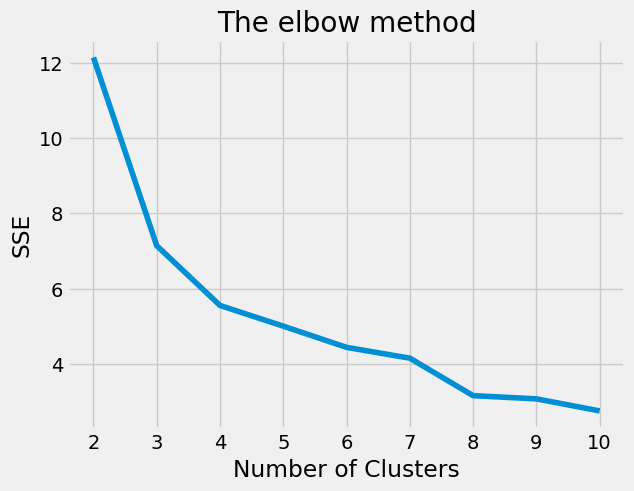

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [33]:
kmeans = KMeans(n_clusters=3, random_state=0)
saida_kmeans = kmeans.fit_predict(Entrada)

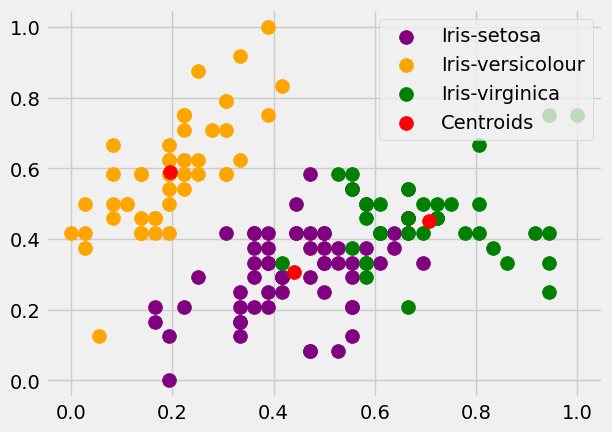

In [34]:
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()